<a href="https://colab.research.google.com/github/aalok-1409/Prodigy_Infotech_Internship/blob/main/PRODIGY_DS_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

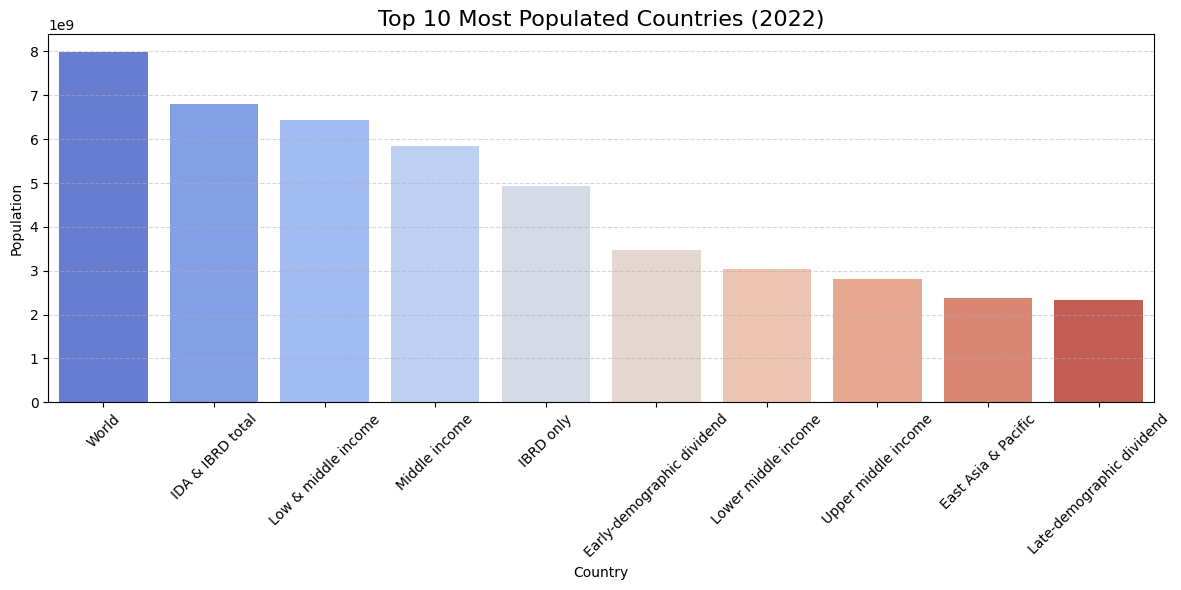

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import requests
import io

# Step 1: Download the dataset ZIP file from the World Bank
url = "https://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv"
response = requests.get(url)

# Step 2: Extract the CSV from the ZIP file
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    # Find the main data file (it usually starts with 'API_')
    for filename in z.namelist():
        if filename.startswith('API_SP.POP.TOTL_DS2') and filename.endswith('.csv'):
            with z.open(filename) as f:
                df = pd.read_csv(f, skiprows=4)

# Step 3: Select latest available year (example: 2022)
df_latest = df[['Country Name', '2022']].dropna()
df_latest.columns = ['Country', 'Population']

# Step 4: Sort and pick top 10 most populated countries
df_top10 = df_latest.sort_values(by='Population', ascending=False).head(10)

# Step 5: Plot bar chart
plt.figure(figsize=(12, 6))
# Add hue=Country and legend=False to address FutureWarning
sns.barplot(x='Country', y='Population', data=df_top10, palette='coolwarm', hue='Country', legend=False)


plt.title('Top 10 Most Populated Countries (2022)', fontsize=16)
plt.xlabel('Country')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()